## Student BITS ID: 2020hs70033

## Student Name: Saksham Jain


# Work to do:

The student can choose  any prediction task or clustering (from below) and implement it using Python.  The Student can also choose any dataset from UCI / Kaggle or any other public dataset.
For example, if you choose a regression task, then the dataset should be such that the regression can be performed on the dataset. The ML algos to be implemented will be linear regression and Random forest regressor. Evaluate the ML algorithms appropriately using any of the evaluation metrics​ learned. Perform hyper-parameter tuning.

Restiction: Use only sklearn library for the ML tasks.

1. Classification
    1.1 Logistic regression
    1.2 SVM
    1.3 Decision Tree or Random Forest classifier 

2. Regression
    2.1 Linear regression
    2.2 Random Forest regression

3. Clustering
    3.1 kmeans algorithm
    3.2 EM algorithm

4. For textual data
    4.1 NB classifier 
    4.2 Logistic regression


The student is instructed to submit a word document to explain the chosen data and ML algos, explain and justify why one algo works better than the other. Use the experiments to support your argument.

Students are instructed to submit  ipynb, pdf of the Python implementation and report as a word document.



In [1]:
import os, urllib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 1.1 Download the data directly



In [2]:
##---------Type the code below this line-----------------##
url = "https://raw.githubusercontent.com/sakshamjain2411/AML/main/train.csv"
csv_file_path = "train.csv"
urllib.request.urlretrieve(url, csv_file_path)

('train.csv', <http.client.HTTPMessage at 0x7fd0b640a690>)

## 1.2 Code for converting the above downloaded data into a dataframe

In [3]:
data = pd.read_csv("train.csv")

## 1.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [4]:
##---------Type the code below this line------------------##
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


## 1.4 Display the column headings, statistical information, description and statistical summary of the data.

In [6]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
##---------Type the code below this line------------------##
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## 1.5 Write your observations from the above. 
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?


In [8]:
##--------------Type the answers below this line--------------
data.shape

(2000, 21)

In [9]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# 2. Data Preparation

## 2.1 Display how many unique values are present in each attribute


In [10]:
##---------Type the code below this line------------------##
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


## 2.2 Check for the presence of duplicate data, identify the attributes with duplicate data, report the attributes. Mention the method adopted to remove duplicate data if present. Report the results again.

In [11]:
##---------Type the code below this line------------------##
data.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

## 2.3 Show whether there are any missing values in each attribute. Report the same. Clean the missing data using any imputation technique, mention the method used and again report the change after cleaning the data.


In [12]:
##---------Type the code below this line------------------##
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## 2.4 Check if all the attributes are following the same format and are consistent. If not, report all such attributes and what inconsistencies are present. Correct the data if there are inconsistencies. Report or print the data after correction.

In [13]:
##---------Type the code below this line------------------##
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## 2.5 Identify the target variables. Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label). Discretize the target variable or perform one-hot encoding or label encoding on the target or any other as and if required.



In [14]:
##---------Type the code below this line------------------##
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X = data.drop('price_range',axis=1)
y = data['price_range']

scaler.fit(X)
X_transformed = scaler.transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.3, random_state=31)

# 3. Implement Machine Learning Techniques

## 3.1 ML Technique Linear Regression

In [15]:
##---------Type the code below this line------------------##
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [16]:
##---------Type the code below this line------------------##
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [17]:
lr.score(X_test,y_test)

0.9153796136870499

Linear&nbsp;Regression&nbsp;model&nbsp;has&nbsp;a&nbsp;accuracy&nbsp;of&nbsp;91%&nbsp;which&nbsp;is&nbsp;also&nbsp;good.

In [18]:
y_pred=lr.predict(X_test)

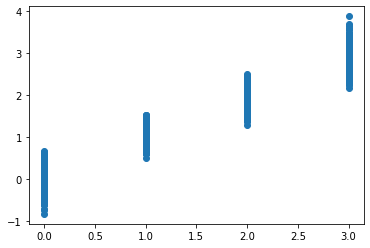

In [19]:
plt.scatter(y_test,y_pred)

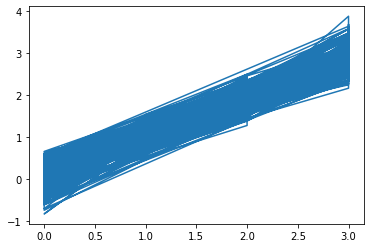

In [20]:
plt.plot(y_test,y_pred)

## 3.2 ML Technique Random Forest

In [21]:
##---------Type the code below this line------------------##
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
melb_preds = forest_model.predict(X_test)
print(mean_absolute_error(y_test, melb_preds))


0.17698333333333333


In [22]:
forest_model.score(X_test, y_test)

0.9398583463835892

In [23]:
y_pred=forest_model.predict(X_test)

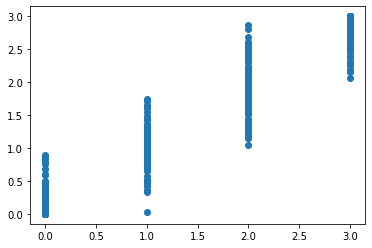

In [24]:
plt.scatter(y_test,y_pred)

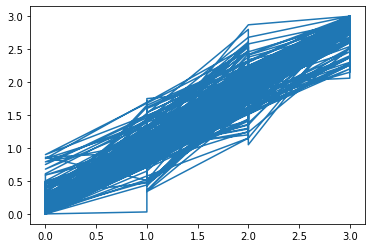

In [25]:
plt.plot(y_test,y_pred)

## 4. Conclude 

### 4.1 Compare the performance of the ML techniques used.

plot accuracy or any other performance metric to compare the ML algo.


In [26]:
##---------Type the code below this line------------------##

From the results its clear that **Random Forest Algorithm has the best accuracy** among the other algorithms.

| Classification Algorithm | Accuracy (%) |
|---|---|
|Random Forest       |93.00%|
|Linear Regression   |91.00%|

So from the above techniques used we can conclude that Random Foreset is better than Linear Regression as it shows the accuracy of 93.00% on contrast of Linear Regression that shows 91.00%

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a30eed55-7ae6-4536-973e-c572d6e02c9d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>